### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)


https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.85708&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

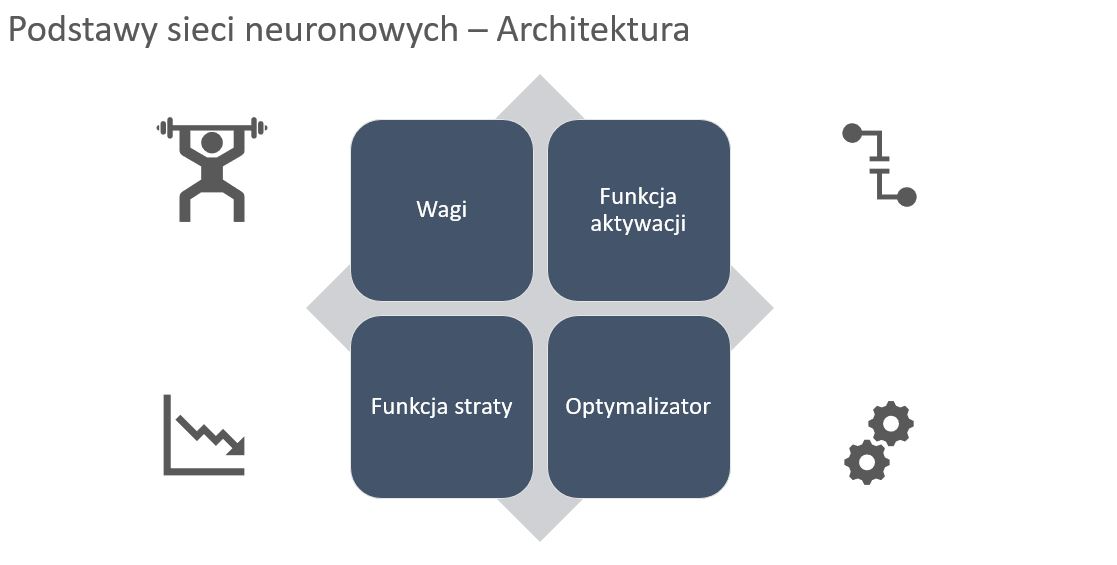

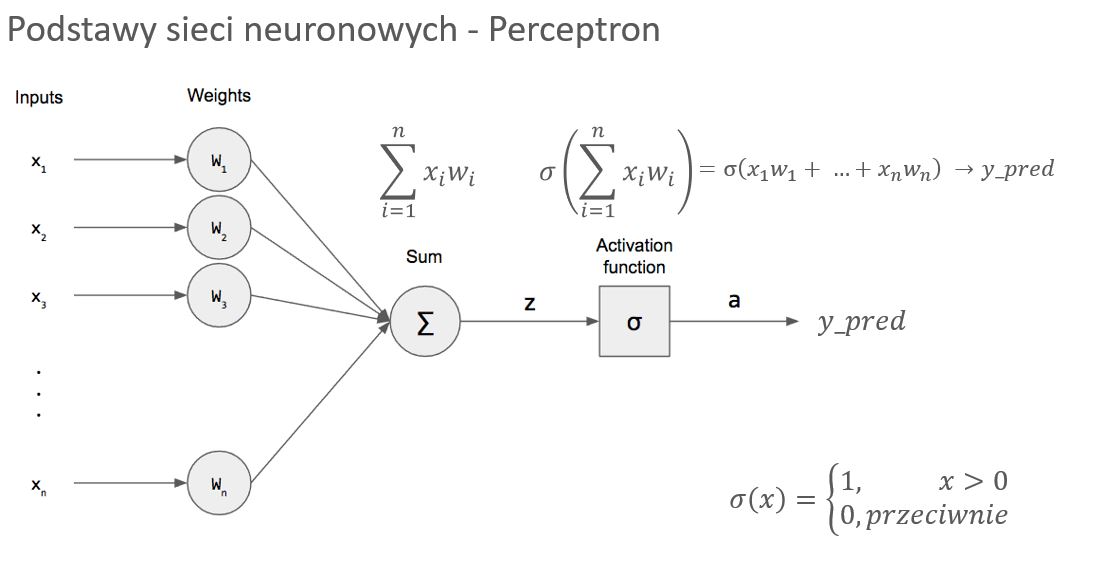

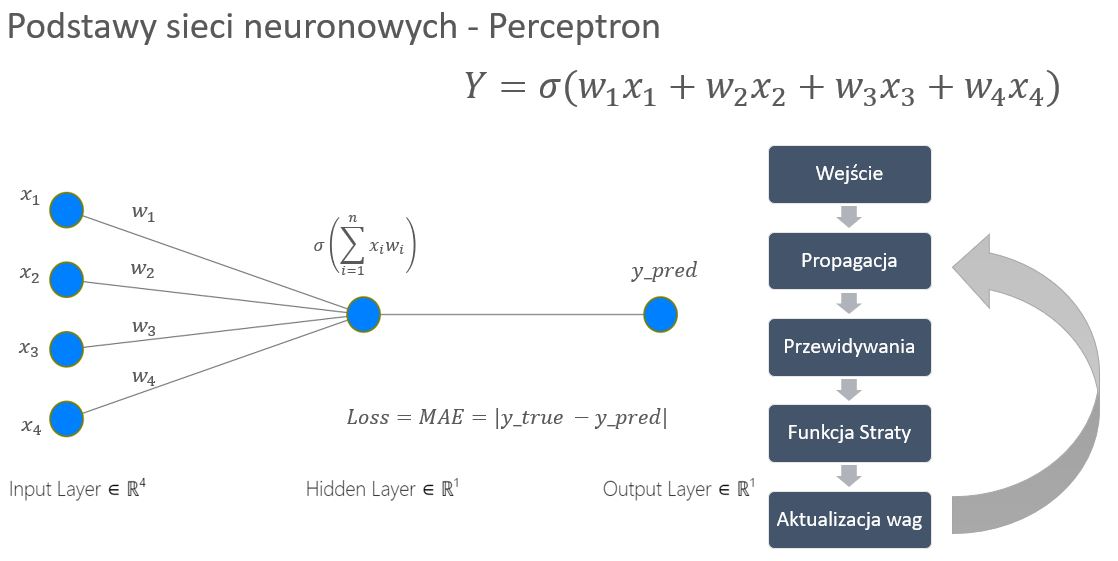

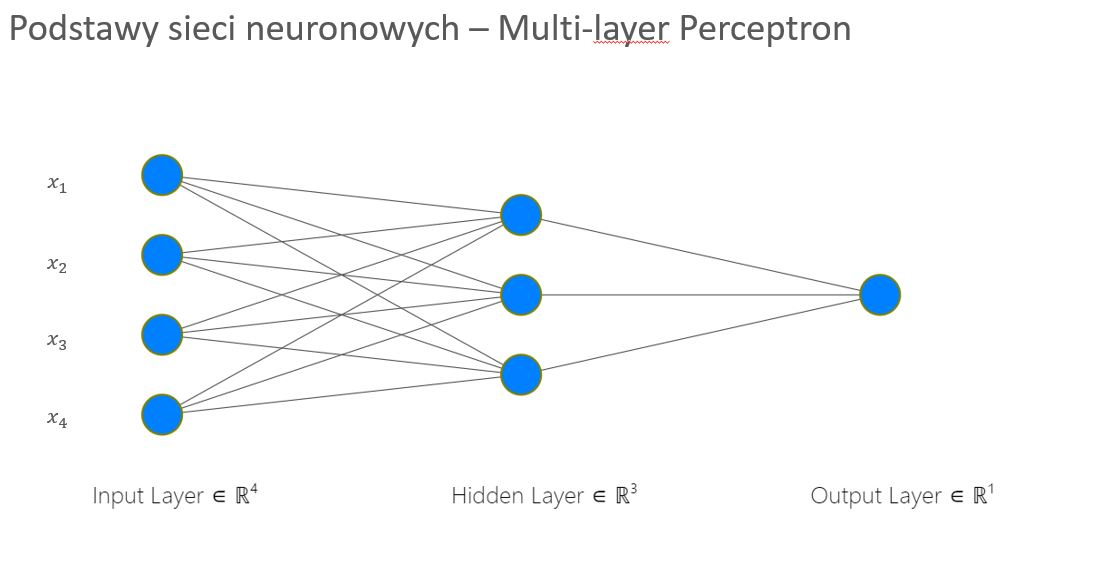

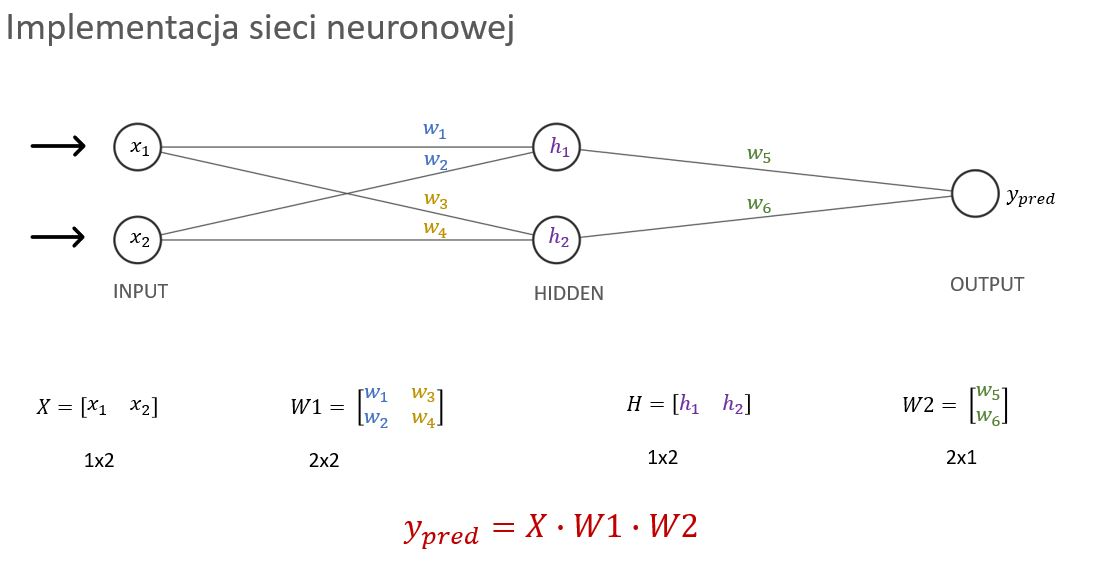

### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


In [3]:
# DLA WINDOWS:

# pip install tensorflow

# DLA MAC OS:

# pip install tensorflow-macos
# pip install tensorflow-metal 

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)

2.16.2


In [5]:
import numpy
import sys
print("Wersja NumPy:", numpy.__version__)
print("Ścieżka do NumPy:", numpy.__file__)
print("Używany Python:", sys.executable)


Wersja NumPy: 1.26.4
Ścieżka do NumPy: /Users/tomasz/Desktop/ML_DL_Python_Comarch/.venv/lib/python3.9/site-packages/numpy/__init__.py
Używany Python: /Users/tomasz/Desktop/ML_DL_Python_Comarch/.venv/bin/python


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.16.2


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [7]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [9]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [10]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

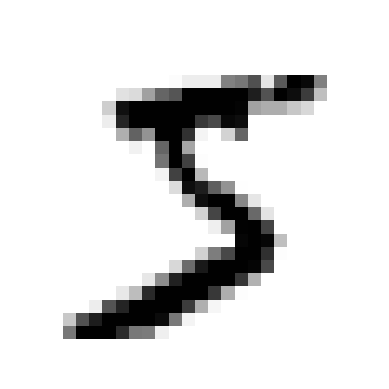

In [11]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off');

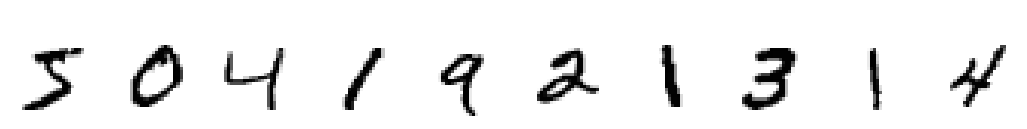

In [12]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-12-19 14:00:03.103395: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-19 14:00:03.103424: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-19 14:00:03.103430: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-19 14:00:03.103458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-19 14:00:03.103466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> Trenowanie modelu

In [14]:
history = model.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5


2025-12-19 14:00:03.711825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8192 - loss: 0.6019
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8905 - loss: 0.3853
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8881 - loss: 0.4023
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8871 - loss: 0.4094
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8881 - loss: 0.4033


### <a name='a7'></a> Ocena modelu

In [15]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9190 - loss: 0.2946


[0.2946213483810425, 0.9190000295639038]

In [16]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.870050,0.444237
1,0.888433,0.396314
2,0.886600,0.407649
3,0.885633,0.408512
4,0.886667,0.403757


In [17]:
!%pip install plotly nbformat --upgrade

zsh:fg:1: no job control in this shell.


In [18]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'loss',
              'type': 'scatter',
              'xaxis': 'x',
              'y': {'bdata': 'AAAAoF9u3D8AAACgNV3ZPwAAAMDtFto/AAAAoA4l2j8AAAAgKdfZPw==', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'name': 'accuracy',
              'type': 'scatter',
              'xaxis': 'x2',
              'y': {'bdata': 'AAAAIHPX6z8AAADAC27sPwAAAAAHX+w/AAAAwBtX7D8AAADAkl/sPw==', 'dtype': 'f8'},
              'yaxis': 'y2'}],
    'layout': {'height': 400,
               'template': '...',
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}}
})

### <a name='a8'></a> Predykcja na podstawie modelu

In [19]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.000010421554, 0.000000000043, 0.000037356167, ..., 0.99694       , 0.00001658432 , 0.000534058   ],
       [0.00005859506 , 0.000000705444, 0.9927872     , ..., 0.            , 0.000029677854, 0.            ],
       [0.000001004903, 0.986416      , 0.0032632574  , ..., 0.0005819923  , 0.0028491777  , 0.00070970214 ],
       ...,
       [0.00000000129 , 0.000000037211, 0.00000097857 , ..., 0.0006526473  , 0.0014521965  , 0.016874604   ],
       [0.000015913392, 0.000000068586, 0.000001474275, ..., 0.00000024438 , 0.02884796    , 0.000001202242],
       [0.00000022299 , 0.            , 0.00000284882 , ..., 0.            , 0.000000000475, 0.000000000006]],
      dtype=float32)

In [20]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [23]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [28]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([8, 33, 66, 92, 111, 124, 149, 151, 193, 233], dtype='int64')

In [34]:
pred[pred.index == misclassified.index[6]]

,y_test,y_pred
149,2,9


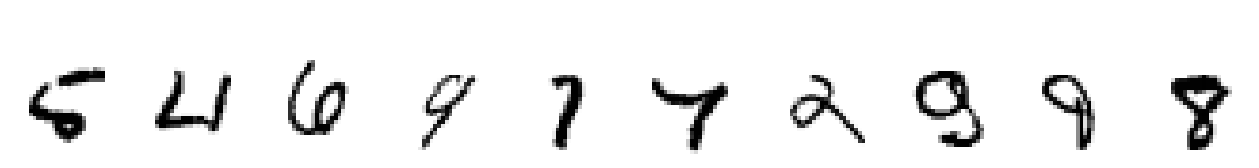

In [27]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()